#***Detección MAP y ML para canal con distribución de Poisson (fibra óptica)***

**Consignas:**

1) Grafique en una misma figura las probabilidades condicionales P(Y|H) para H = 0 y H = 1 del ejemplo 2.4 del libro. Elija parámetros para la función de densidad de Poisson y saque conclusiones.

2) Genere una distribución de Poisson y realice su histograma.

3) Determine las regiones de decisión MAP y ML. Para el caso MAP, proponga una distribución de probabilidad de las hipótesis.

4) Estime estadísticamente la probabilidad error y realice una gráfica de probabilidad de error vs SNR[DB].

###***Enunciado del ejemplo 2.4:***

Como un ejemplo típico de un problema de test de hipótesis, consideremos el problema de comunicar un bit de información a través de fibra óptica.\
El bit a transmitir está modelado por la variable H ∈ {0, 1}, con PH(0) = 1/2.\
Si H = 1, encendemos un diodo emisor de luz (LED) y su luz es llevada a lo largo de la fibra óptica hasta el fotodetector.\
La salida del fotodetector es el número de fotones Y ∈ N que detecta. El problema es decidir si H = 0 (el LED está apagado) o si H = 1 (el LED está encendido).\
Nuestra decisión sólo puede basarse en la información que tengamos priori sobre el modelo y sobre la observación Y = y.\
Lo que hace el problema interesante, es que es imposible determinar H partiendo desde Y con certeza. Incluso cuando el LED está apagado, el detector es propenso a detectar algunos fotones (por ejemplo, por la "luz del ambiente").\
Podemos asumir que Y tiene distribución de Poisson con intensidad λ, la cual depende de si el LED está prendido o apagado.\
Matemáticamente, la situación es como sigue:

****Cuando H = 0:*** $Y:  P_{Y|H}(y|0) = \frac{λ_0^y e^{-λ_0}}{y!}$\
****Cuando H = 1:*** $Y:  P_{Y|H}(y|1) = \frac{λ_1^y e^{-λ_1}}{y!}$\

donde $0 \leq λ_0 < λ_1$.\

Leemos lo de arriba de la forma: "*Cuando H = 0, la observable **Y** tiene distribución de Poisson con intensidad $λ_0$. Cuando H = 1, **Y** tiene distribución de Poisson con intensidad $λ_1$.*"\
Una vez más, el problema de elegir H en base a la observable **Y** es un problema de test de hipótesis estándar.
##***Respuestas:***

1) y 2):

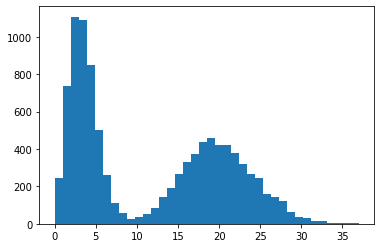

In [11]:
import numpy as np
import matplotlib.pyplot as plt

cantidadMuestras = 10000

H = [0, 1]

P = [0.5, 0.5]

Lambda = [3, 20]

mensajeEnviado = np.random.choice(H, size = cantidadMuestras, p = P)

mensajeConRuido = []

for i in range(cantidadMuestras):
	if (mensajeEnviado[i] == 0): mensajeConRuido.append(np.random.poisson(Lambda[0]))
	else: mensajeConRuido.append(np.random.poisson(Lambda[1]))

plt.hist(mensajeConRuido, bins = 38)
plt.show()

3): $\theta = \frac{\lambda_1 - \lambda_0}{ln(\frac{\lambda_1}{\lambda_0})}$



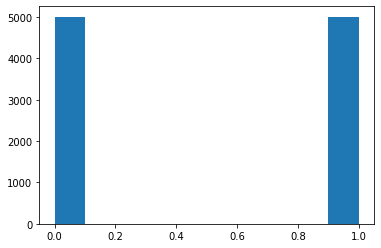

In [4]:
threshold = (Lambda[1] - Lambda[0]) / np.log(Lambda[1] / Lambda[0])

mensajeDecodificado = []

for i in range(cantidadMuestras):
	if (mensajeConRuido[i] > threshold): mensajeDecodificado.append(1)
	else: mensajeDecodificado.append(0)

plt.hist(mensajeDecodificado)
plt.show()

4)

In [14]:
cerosEnviados = list(mensajeEnviado).count(0)
cerosRecibidos = list(mensajeDecodificado).count(0)

unosEnviados = list(mensajeEnviado).count(1)
unosRecibidos = list(mensajeDecodificado).count(1)

error = (abs(cerosEnviados - cerosRecibidos) + abs(unosEnviados - unosRecibidos)) / cantidadMuestras

print("Cantidad de '0' enviados: ", cerosEnviados)
print("Cantidad de '1' enviados: ", unosEnviados)
print("Cantidad de '0' recibidos: ", cerosRecibidos)
print("Cantidad de '1' recibidos: ", unosRecibidos)
print("Error estadístico: ", error * 100, "%")

Cantidad de '0' enviados:  4967
Cantidad de '1' enviados:  5033
Cantidad de '0' recibidos:  5005
Cantidad de '1' recibidos:  4995
Error estadístico:  0.76 %
